In [2]:
# Importing essential packages
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("dataset_and_description/PlayerStats.csv")

In [4]:
# Now display a few rows of the datasets
df.head()

,player,injury type,season,LEBRON diff,BPM diff,age,height,weight,previous injury,change,O-LEBRON diff,D-LEBRON diff,avg minutes,o-change,d-change
0,Ratliff,2,2010,-10.000,-10.00,37,82,225,1,1,-5.000,-5.000,16.5,4,4
1,Perkins,0,2010,-2.280,-1.65,25,82,270,0,2,-1.585,-0.680,26.9,1,2
2,Okur,1,2010,-2.040,-4.30,31,83,249,0,2,-0.585,-1.455,29.4,2,2
3,Andersen,0,2010,-1.575,0.65,32,82,245,0,3,-1.190,-0.390,22.3,2,3
4,Haslem,1,2010,-0.970,-0.35,30,80,235,0,3,-1.080,0.120,27.9,2,3


In [5]:
# create a new BMI columns 
df['BMI'] = 703 * df['weight'] / (df['height'] ** 2)

In [6]:
# Now display some few header rows again 
df.head()

,player,injury type,season,LEBRON diff,BPM diff,age,height,weight,previous injury,change,O-LEBRON diff,D-LEBRON diff,avg minutes,o-change,d-change,BMI
0,Ratliff,2,2010,-10.000,-10.00,37,82,225,1,1,-5.000,-5.000,16.5,4,4,23.523944
1,Perkins,0,2010,-2.280,-1.65,25,82,270,0,2,-1.585,-0.680,26.9,1,2,28.228733
2,Okur,1,2010,-2.040,-4.30,31,83,249,0,2,-0.585,-1.455,29.4,2,2,25.409639
3,Andersen,0,2010,-1.575,0.65,32,82,245,0,3,-1.190,-0.390,22.3,2,3,25.614961
4,Haslem,1,2010,-0.970,-0.35,30,80,235,0,3,-1.080,0.120,27.9,2,3,25.813281


# Note that this analysis will not focus on all of these factors, it will just focus on some interested factors

In [7]:
df = df[['player', 'injury type', 'season', 'age', 'height', 'weight', 'previous injury', 'change', 'avg minutes', 'BMI']]

In [8]:
# Display the dataframe again 
df.head()

,player,injury type,season,age,height,weight,previous injury,change,avg minutes,BMI
0,Ratliff,2,2010,37,82,225,1,1,16.5,23.523944
1,Perkins,0,2010,25,82,270,0,2,26.9,28.228733
2,Okur,1,2010,31,83,249,0,2,29.4,25.409639
3,Andersen,0,2010,32,82,245,0,3,22.3,25.614961
4,Haslem,1,2010,30,80,235,0,3,27.9,25.813281


## Now check for NaN values first 

In [9]:
df.isna().sum()

player             0
injury type        0
season             0
age                0
height             0
weight             0
previous injury    0
change             0
avg minutes        0
BMI                0
dtype: int64

- Okay all good not any NaN values here, no need to handle the datasets

## Now check the value of the features in the dataframe

In [10]:
unique = df.columns.tolist()
for col_name in unique:
    col = df[col_name]
    print("This is column: " + col_name)
    print(col.value_counts())
    print("")
    print("*" * 80)
    print("")

This is column: player
player
Rose          4
Andersen      2
Davis         2
Bledsoe       2
Varejao       2
             ..
Williamson    1
Miller        1
T. Bryant     1
Dinwiddie     1
Fultz         1
Name: count, Length: 99, dtype: int64

********************************************************************************

This is column: injury type
injury type
2    44
0    42
1    27
Name: count, dtype: int64

********************************************************************************

This is column: season
season
2012    16
2017    14
2013    13
2015    12
2020    10
2010     9
2011     8
2016     8
2014     7
2018     7
2019     6
2021     3
Name: count, dtype: int64

********************************************************************************

This is column: age
age
30    13
25    12
23    11
27    10
24     9
22     8
28     7
26     7
21     6
31     5
32     5
29     5
34     3
20     2
19     2
36     2
33     2
37     1
35     1
39     1
38     1
Name: count, dty

## Basic notes from the value counts of these features 
#### With Player 
- Derick Rose is the player with highest number of SERIOUS INJURIES - not only 1 time but 4 TIMES, such a significant number of serious injusries he had to go through --> which then contribute to the decrease of his career since his incredible MVP year
#### With Injury Type 
- Nothing special here, require further analysis
#### With Season 
- The years before 2015 witness an outstanding number of serious injusries compared to that of the years after 2015. This can be due to many reasons - we can investigate later, but these reasons might include unappropriate game schedule at that time, or unmodern sport science and therapy like nowadays --> would see later with future analysis
#### With Age 
- The player at the age of 25-30 witness an oustanding number of serious injuries analysis compared to that of other age groups. This might be due to the fact that at this period of a player's career, it is normally be their peak --> trying to play as hard as they could --> potential harm to their body --> therefore lead to these career-destroyed injuries
#### With height 
- Player with height > 75 inches (6ft3) tends to be more sensitive to serious injuries compared to the other. This is quite understandable as with taller player, the length of their muscle, their tendon, their ligament is longer than that of the shorter one, therefore their body is more sensitive to stretching movement - especially with a sport that require players to continuously change their direction like basketball.
#### With weight 
- Once again, the player with higher weights (>200 pounds) is more likely to suffer from serious injuries. This is also understandable as the higher weight, the more pressure their muscle, tendon, ligament has to loaded --> higher chance to suffer from these serious injuries
#### With Player's Injury History
- Here we can see that the number of player suffer from these serious injuries outweight that of those who used to suffer from a serious injury before (88 compared to 25)
- The reason might be the fact that when player used to suffer from such a serious injury, they perceiev the risk of their playing style and the importance of maintaining their body. Therefore it makes them be more careful with how they play and feed their body --> therefore lower number of serious injuries compared to those who has never suffered from such a serious injury before
#### With change 
- The basic value count does not show any special patterns here, require further analysis 
#### With average minutes and BMI 
- We will conduct further analysis later 

## Now check basic correlations between features here - choosing Pearson correlation as the feature's values are numerical and seems to have linear relationship 

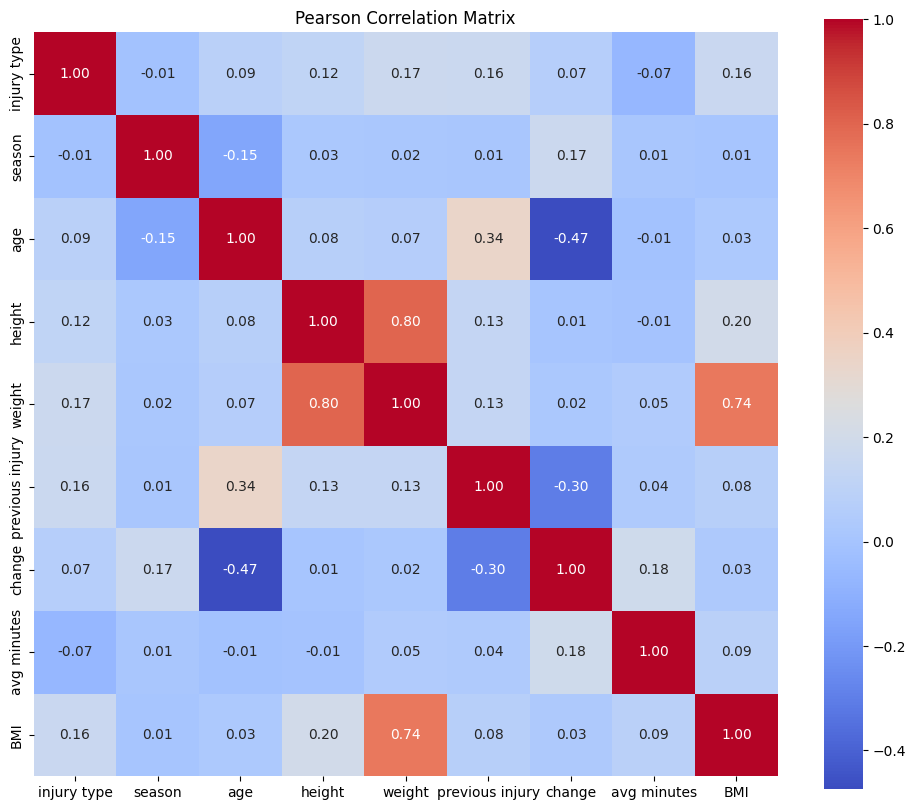

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate Pearson correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

Facts from this Pearson correlation analysis 
- the higher age, the higher chance of worse performance after injuries (-0.47)
- the higher number of history's injuries number, the higher chance of worse performance after injuries (-0.3)

# Things to investigate deeper now:
- change (the impact of injury on players with 1 for significant decrease and then 4 for improving)
- average minutes 
- BMI

## Now go with "Change" first 

In [12]:
# Now recall the value counts for the change columns 
change = df['change']
change.value_counts(dropna=False)

change
3    34
2    33
4    26
1    20
Name: count, dtype: int64

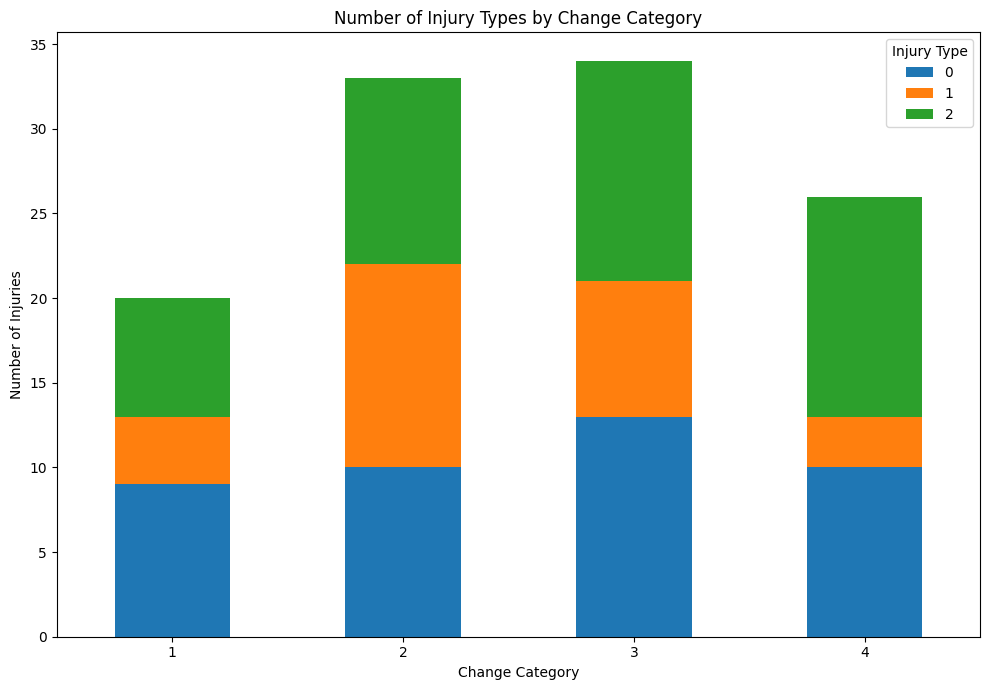

In [15]:
# Now create a stacked bar chart to visualize the distribution of each types of injury type with each "change" values 
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab to count injury types by change
injury_crosstab = pd.crosstab(df['change'], df['injury type'])

# Plotting the stacked bar chart
injury_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Injury Types by Change Category')
plt.xlabel('Change Category')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(title='Injury Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Some few notes from this stacked bar chart
- Firstly with the big picture, a good news is that the number of those be significantly or mediumly affected by these serious injuries do not outweight that of those who are just slightly or not be affected by these injuries. 
- Now go with those who has been significantly affected by these injuries, we can easily see that with this category, players normally had to suffered from ACL and Achilles torn than the other category
- Meanwhile when we take a look around, from left to right, we can easily see that the less significance of the impact on players, the lower proportion of ACL and Achilles torn injuries. This has shown the risk, the really significantly negative impacts of ACL and Achilles to players

## Now go with "average minutes"

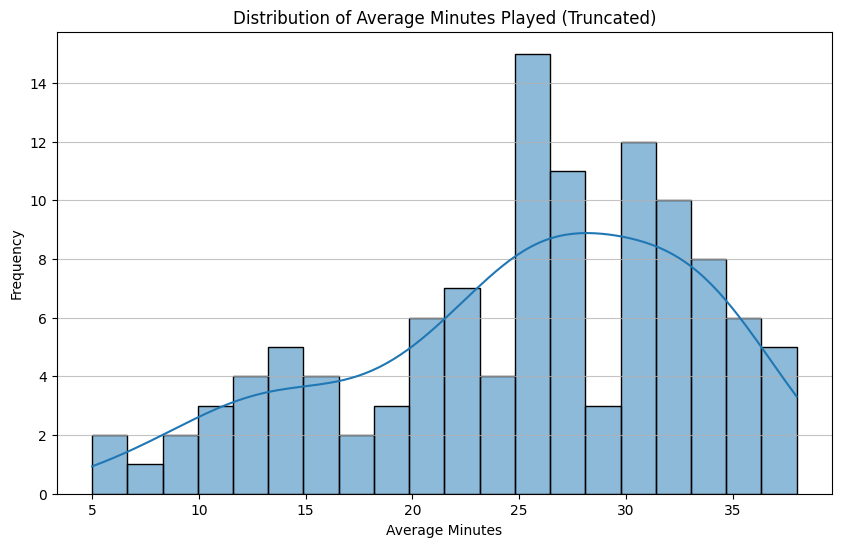

In [16]:
# With average minutes, we will convert it to truncate the decimal parts, therefore create a distribution graph
df['avg minutes'] = df['avg minutes'].astype(int)

# Time for plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['avg minutes'], kde=True, bins=20)
plt.title('Distribution of Average Minutes Played (Truncated)')
plt.xlabel('Average Minutes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Some key notes from this graph:
- it can be easily see that graph is more moved to the right, indicate that the higher number of minutes player played, the higher risk of taking serious injuries. This is understandable as when having to play under an extremely high tempo, it is easy for players to cause tension for their muscle, their tendon, .. therefore leading to serious injuries

## Now go with "BMI"

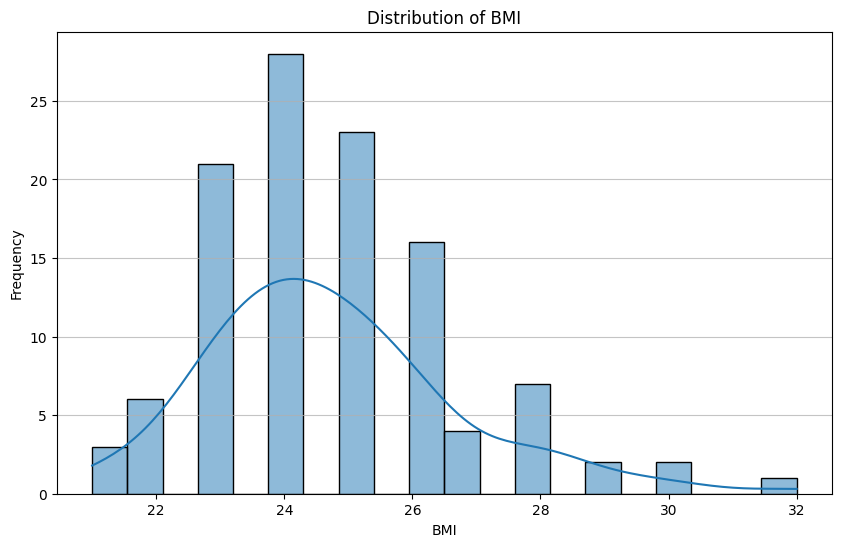

In [17]:
# With average minutes, we will convert it to truncate the decimal parts, therefore create a distribution graph
df['BMI'] = df['BMI'].astype(int)

# Time for plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This graph shown this fact:
- Player with BMI centroid to around 24 are more likely to suffer from serious injuries
- This might be surprised as some may suppose that player with higher BMI would more likely to get these serious injuries due to the high pressure that their body weight put on their muscle and tendon. However, a possible reason for this counter argument is that due to their high BMI, so their playing style cannot be aggressive, be hustle --> therefore decrease the risk of suffering from serious injuries 
- Another reason for this fact is that the BMI of around 23-24 is identical for a player's physical. Therefore players will take this advantage and then have a playing style which is aggresive, speed, hustle with many movement changing --> all of these factors together contribute to the high risk of getting serious injuries. 